In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('testSet.txt', sep = '\t', names = ['x', 'y', 'label'])

In [3]:
data = np.mat(df[['x', 'y']].values)
label = np.mat(df['label'].values).T

In [4]:
data[0]

matrix([[3.542485, 1.977398]])

In [5]:
def SelectI2Rand(i1, m):
    i2 = int(np.random.uniform(0, m))
    while i2 == i1:
        i2 = int(np.random.uniform(0, m))
    
    return i2

In [6]:
"""
核函数定义
"""
def kernel(x1, x2):
    return x1 * x2.T

In [7]:
"""
input: 
    data: 数据矩阵
    label: 标签举证
    C: 大于0的常数
    toler: 容错率
    maxIter: 最大迭代次数
output:
    b: 常数b
    alpha: Lagrange乘子
"""
def SimpleSMO(data, label, C, toler, maxIter):
    b = 0;m, n = data.shape
    alpha = np.mat(np.zeros((m,1)))
    iter = 0
    while(iter < maxIter):
        alphaChanged = 0
        for i1 in range(m):
#             if i1 == i2: return 0
            alpha1 = alpha[i1]
            x1 = data[i1]
            y1 = label[i1]
            y1_ = float(np.multiply(alpha, label).T * (data * x1.T)) + b
            E1 = y1_ - y1
            if ((y1 * E1 < -toler) and (alpha1 < C)) or ((y1 * E1 > toler) and (alpha1 > 0)):
                i2 = SelectI2Rand(i1, m)
                alpha2 = alpha[i2]
                x2 = data[i2]
                y2 = label[i2]
                y2_ = float(np.multiply(alpha, label).T * (data * x2.T)) + b
                E2 = y2_ - y2
                s = y1 * y2
                
                if y1 != y2:
                    L = max(0, alpha2 - alpha1)
                    H = min(C, C + alpha2 - alpha1)
                else:

                    L = max(0, alpha2 + alpha1 - C)
                    H = min(C, alpha2 + alpha1)
                if L == H: print('L == H'); continue
                eta = kernel(x1, x1) + kernel(x2, x2) - \
                      2 * kernel(x1, x2)

                if eta > 0:
                    alpha2_new = alpha2 + y2 * (E1 - E2) / eta
                    if alpha2_new >= H:
                        alpha2_new = H
                    elif alpha2_new <= L:
                        alpha2_new = L
                    else:
                        alpha2_new = alpha2_new

            #         alpha1_new = alpha1 + s * (alpha2 - alpha2_new_c)
                else:
                    print('eta <= 0'); continue
                
                if (abs(alpha2_new - alpha2) < 0.00001):
                    print('i2 not moving enough!'); 
                    continue
                alpha1_new = alpha1 + s * (alpha2 - alpha2_new)
                
#                 b1 = E1 + y1 * (alpha1_new - alpha1) * kernel(data[i1], data[i1]) + \
#                      y2 * (alpha2_new - alpha2) * kernel(data[i1], data[i2]) + b
#                 b2 = E2 + y1 * (alpha1_new - alpha1) * kernel(data[i1], data[i2]) + \
#                      y2 * (alpha2_new - alpha2) * kernel(data[i2], data[i2]) + b
                b1 = b - (E1 + y1 * (alpha1_new - alpha1) * kernel(x1, x1) + \
                     y2 * (alpha2_new - alpha2) * kernel(x1, x2))
                b2 = b -  (E2 + y1 * (alpha1_new - alpha1) * kernel(x1, x2) + \
                     y2 * (alpha2_new - alpha2) * kernel(x2, x2))
                if alpha1 > 0 and alpha1 < C:
                    b = b1
                elif alpha2 > 0 and alpha2 < C:
                    b = b2
                else : b = (b1 + b2) / 2
                alpha[i1] = alpha1_new
                alpha[i2] = alpha2_new
                alphaChanged += 1
                print('iter: {}, i: {} pairs changed'.format(iter, i1, alphaChanged))
        
        if (alphaChanged == 0) : iter += 1
        else : iter = 0
        print('iteration number: {}'. format(iter))
    
    return b, alpha

In [8]:
b, alpha = SimpleSMO(data, label, 0.6, 0.001, 40)

iter: 0, i: 0 pairs changed
iter: 0, i: 4 pairs changed
L == H
L == H
L == H
iter: 0, i: 23 pairs changed
i2 not moving enough!
iter: 0, i: 26 pairs changed
i2 not moving enough!
L == H
i2 not moving enough!
i2 not moving enough!
L == H
i2 not moving enough!
iter: 0, i: 69 pairs changed
L == H
i2 not moving enough!
i2 not moving enough!
iteration number: 0
i2 not moving enough!
i2 not moving enough!
iter: 0, i: 8 pairs changed
i2 not moving enough!
i2 not moving enough!
i2 not moving enough!
i2 not moving enough!
i2 not moving enough!
i2 not moving enough!
L == H
i2 not moving enough!
L == H
i2 not moving enough!
i2 not moving enough!
iter: 0, i: 69 pairs changed
i2 not moving enough!
i2 not moving enough!
i2 not moving enough!
i2 not moving enough!
iteration number: 0
L == H
i2 not moving enough!
i2 not moving enough!
i2 not moving enough!
i2 not moving enough!
i2 not moving enough!
i2 not moving enough!
iter: 0, i: 26 pairs changed
L == H
L == H
L == H
L == H
L == H
iter: 0, i: 55 pa

i2 not moving enough!
i2 not moving enough!
i2 not moving enough!
iteration number: 1
i2 not moving enough!
i2 not moving enough!
i2 not moving enough!
i2 not moving enough!
i2 not moving enough!
iter: 1, i: 55 pairs changed
iteration number: 0
i2 not moving enough!
i2 not moving enough!
i2 not moving enough!
i2 not moving enough!
iteration number: 1
i2 not moving enough!
i2 not moving enough!
i2 not moving enough!
i2 not moving enough!
iteration number: 2
i2 not moving enough!
i2 not moving enough!
i2 not moving enough!
i2 not moving enough!
iteration number: 3
i2 not moving enough!
i2 not moving enough!
i2 not moving enough!
i2 not moving enough!
iteration number: 4
i2 not moving enough!
iter: 4, i: 29 pairs changed
i2 not moving enough!
iter: 4, i: 54 pairs changed
iteration number: 0
i2 not moving enough!
i2 not moving enough!
i2 not moving enough!
iteration number: 1
i2 not moving enough!
i2 not moving enough!
i2 not moving enough!
iteration number: 2
i2 not moving enough!
i2 not 

In [9]:
x = data.T[0].getA()[0]
y = data.T[1].getA()[0]

In [10]:
def floatrange(start,stop,steps):
    ''' Computes a range of floating value.
        
        Input:
            start (float)  : Start value.
            end   (float)  : End value
            steps (integer): Number of values
        
        Output:
            A list of floats
    '''
    return [start+float(i)*(stop-start)/(float(steps)-1) for i in range(steps)]


In [11]:
# svx = []; svy = []
sv = []
for i in range(len(alpha)):
    if alpha[i] > 0:
#             svx.append(data[i][0])
#             svy.append(data[i][1])
        sv.append(data[i].getA()[0])

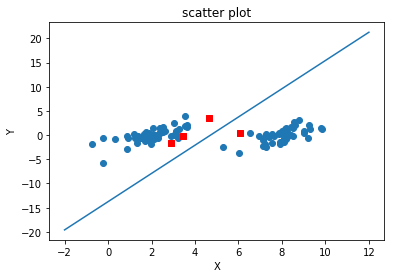

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('scatter plot')
plt.xlabel('X')
plt.ylabel('Y')
ax.scatter(x, y)
b0 = b.getA()[0]
w = (np.multiply(alpha,label).T * data).getA()[0]
w0 = w[0]
w1 = w[1]
x_hyper = np.array(floatrange(-2.0, 12.0, 140))
y_hyper = (-w0 * x_hyper - b0) / w1
ax.plot(x_hyper, y_hyper)
for i in range(len(sv)):
    ax.scatter(sv[i][0], sv[i][1], c = 'r', marker = 's')
plt.show()